<a href="https://colab.research.google.com/github/leksangpelkey/healthcare/blob/main/Strokedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I recently heard in news death of leading play back singer (Krishnakumar Kunnath) famously known as KK due to stroke.

This let to decide, a search of dataset in stroke and i got the dataset from Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

**As per the WHO (World Health Organization) stroke is the 2nd leading cause of dead globally.**

**Columns Description:**

**id**: unique identifier

**gender**: "Male", "Female" or "Other"

**age**: age of the patient

**hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

**heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

**ever_married**: "No" or "Yes"

**work_typ**e: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

**Residence_type**: "Rural" or "Urban"

**avg_glucose_level**: average glucose level in blood

**bmi**: body mass index

**smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*

**stroke**: 1 if the patient had a stroke or 0 if not


Note: "Unknown" in smoking_status means that the information is unavailable for this patient

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient. There are a total of 11 clinical features for predicting stroke events

Also, I am looking to find the answer for following question:

1. Who is likely to get stroke male female?
2. Does age play a role in getting stroke?
3. Do children will get stroke?
4. What is average glucose level for patients with stroke?
5. Does smoking has influence in getting stroke/
6. Does work type has influence in getting stroke?
7. Does residence type has influence in getting stroke?


#Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
url = '/content/drive/MyDrive/strokedata/healthcare-dataset-stroke-data.csv'

In [4]:
df = pd.read_csv(url)

#EDA

In [5]:
#checking the top rows of dataframe

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
#Checking the bottom rows of dataframe

In [8]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [9]:
#Checking the no. of  rows and columns

In [10]:
df.shape

(5110, 12)

In [11]:
#Checking the columns name

In [12]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [13]:
#checking the unique values

In [14]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [15]:
df.stroke.unique()

array([1, 0])

In [16]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [17]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [18]:
#Checking the data type

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [20]:
#Checking the null value

In [21]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

bmi has the missing values 201

In [22]:
#imputing missing values with median

In [23]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [24]:
# checking if missing values has been imputate

In [25]:
df['bmi'].describe()

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [26]:
# Assingning range and converting bmi to categorical type

In [27]:
df['bmi'] = pd.cut(x=df['bmi'], bins=[0,18.4,24.9,29.9,100],
                     labels=['Underweight','Healthy','Overweight', 'Obese'])

In [28]:
df['bmi'].value_counts()

Obese          1920
Overweight     1610
Healthy        1243
Underweight     337
Name: bmi, dtype: int64

In [29]:
#rename column name ever_married to married 

In [30]:
df = df.rename(columns={'ever_married':'married'})

In [31]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#Visualization

In [32]:
sns.pairplot(df, hue = 'stroke', palette = "viridis")


In [33]:
df.head()

,id,gender,age,hypertension,heart_disease,married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,Obese,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,Overweight,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,Obese,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,Obese,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,Healthy,never smoked,1


In [34]:
#checking if gender is good predictor for stroke

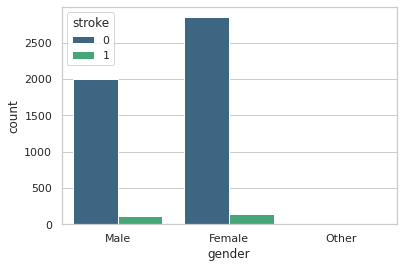

In [35]:
sns.countplot( data=df, x='gender',palette = "viridis",hue='stroke')

Female and male both have equal number of stroke cases while there is not any single case of stroke in other gender type. 

Gender does not seem a strong predictor for the outcome variable.


In [36]:
#checking if hypertension is good predictor for stroke

Text(0, 0.5, 'Proportion of  stroke')

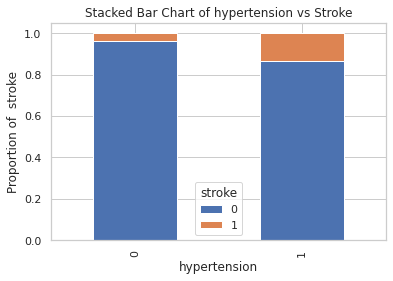

In [37]:
table=pd.crosstab(df.hypertension,df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of hypertension vs Stroke')
plt.xlabel('hypertension')
plt.ylabel('Proportion of  stroke')

Hypertension seems a good predictor of the outcome variable.

In [38]:
#checking if heart disease is good predictor for stroke

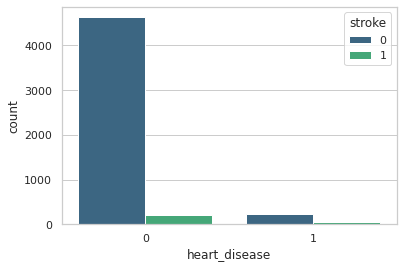

In [39]:
sns.countplot( data=df, x='heart_disease',palette = "viridis",hue='stroke')

the heart_disease does not seem a strong predictor for the outcome variable.

In [40]:
#Checking if marrital status is good predictor of the outcome

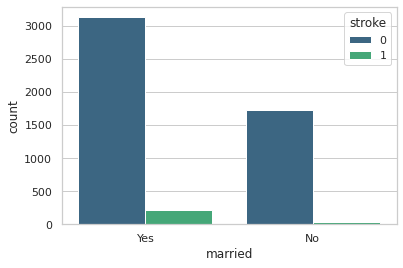

In [41]:
sns.countplot( data=df, x='married',palette = "viridis",hue='stroke')

Patient whoes marrital status is married have more stroke cases then those single. Married is a good predictor of the outcome variable.

In [42]:
df.head()

,id,gender,age,hypertension,heart_disease,married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,Obese,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,Overweight,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,Obese,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,Obese,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,Healthy,never smoked,1


In [43]:
#Checking if work_type is good predictor of the outcome

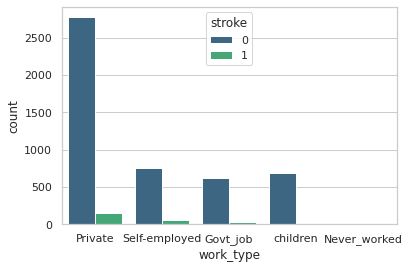

In [44]:
sns.countplot( data=df, x='work_type',palette = "viridis",hue='stroke')

Patient with private job have more number stroke cases then self employed and govt. job

Work_type seems a good predictor of the outcome variable and private employee likely get stroke

In [45]:
#Checking if Residence_type is good predictor of the outcome

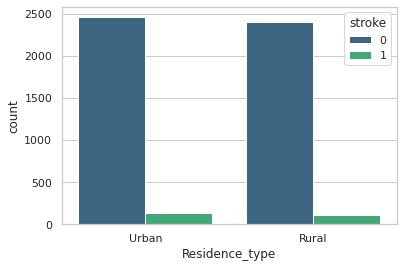

In [46]:
sns.countplot(data=df, x='Residence_type',palette = "viridis",hue='stroke')

Both Urban and rural have equal number of stroke cases, so this is not a useful feature for prediction.

In [47]:
#Checking if bmi is good predictor of the outcome

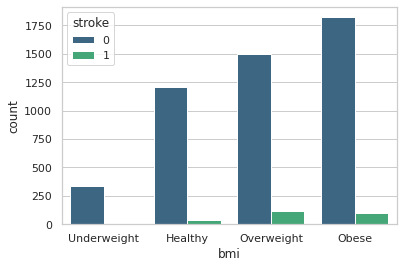

In [48]:
sns.countplot(data=df, x='bmi',palette = "viridis",hue='stroke')

Patient who are overweight and obese have more stroke cases then healthy and underweight patient. 

The bmi seem a strong predictor for the outcome variable. 

In [49]:
#Checking if smoking_status is good predictor of the outcome

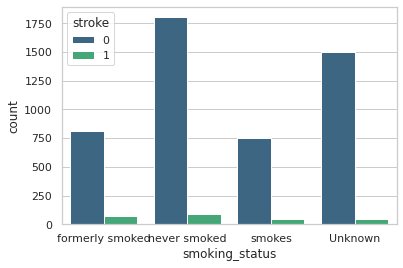

In [50]:
sns.countplot(data=df, x='smoking_status',palette = "viridis",hue='stroke')

Normaly person who smoke are more likely have a chances of stroke but in this dataset smoking doesn't have much impact on stroke.

In [51]:
#checking the distribution of age to target variable(stroke)

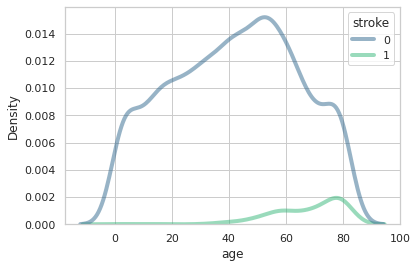

In [52]:
sns.kdeplot( data=df, x='age',hue="stroke", palette="viridis", alpha=.5, linewidth=4)

As peopke start to age the risk of having a stroke is increasing, most of stroke cases belong to 58-80 age group that means most of patients are in their older age. 

The age seem a strong predictor for the outcome variable.

In [53]:
#checking the distribution of avg_glucose_level to target variable(stroke)

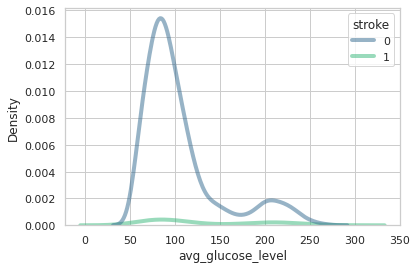

In [54]:
sns.kdeplot(data=df, x ='avg_glucose_level', hue='stroke',  palette = 'viridis', alpha = .5, linewidth = 4)

In [55]:
avg = df[['avg_glucose_level','stroke']]

In [56]:
avg['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [57]:
print("Average glucose level for patients with stroke:", avg[avg['stroke']==1].avg_glucose_level.mean())

Average glucose level for patients with stroke: 132.54473895582322


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   married            5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   category
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 444.5+ KB


In [59]:
#Correlation Matrix

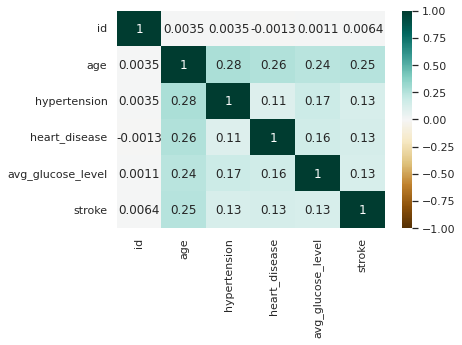

In [60]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Categoricale data 

In [61]:
cat_vars=['gender','married', 'work_type', 'Residence_type', 'bmi', 'smoking_status']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
    
cat_vars=['gender','married', 'work_type', 'Residence_type', 'bmi', 'smoking_status']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]
df_final=df[to_keep]
df_final.columns.values

array(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'married_No', 'married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban', 'bmi_Underweight',
       'bmi_Healthy', 'bmi_Overweight', 'bmi_Obese',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype=object)

In [62]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

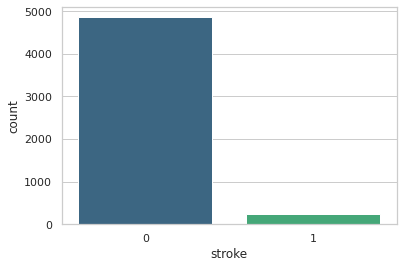

In [63]:
sns.countplot(x='stroke', data = df, palette = "viridis")

In [64]:
count_no_stroke = len(df[df['stroke']==0])
count_stroke = len(df[df['stroke']==1])
pct_of_no_stroke = count_no_stroke/(count_no_stroke+count_stroke)
print("percentage of no stroke is", pct_of_no_stroke*100)
pct_of_stroke = count_stroke/(count_no_stroke+count_stroke)
print("percentage of stroke", pct_of_stroke*100)

percentage of no stroke is 95.12720156555773
percentage of stroke 4.87279843444227


Our classes are inbalanced, and the ratio of no-stroke to stroke instances is 95:5. Before we go ahead to balance the classes, Let's do some more exploration.

#Over sampling using SMOTE

In [65]:
X = df_final.loc[:, df_final.columns != 'stroke']
y = df_final.loc[:, df_final.columns == 'stroke']

In [66]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_df_X,os_df_y=os.fit_resample(X_train, y_train)
os_df_X = pd.DataFrame(data=os_df_X,columns=columns )
os_df_y= pd.DataFrame(data=os_df_y,columns=['stroke'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_df_X))
print("Number of no stroke in oversampled data",len(os_df_y[os_df_y['stroke']==0]))
print("Number of stroke",len(os_df_y[os_df_y['stroke']==1]))
print("Proportion of no stroke data in oversampled data is ",len(os_df_y[os_df_y['stroke']==0])/len(os_df_X))
print("Proportion of stroke data in oversampled data is ",len(os_df_y[os_df_y['stroke']==1])/len(os_df_X))

length of oversampled data is  6808
Number of no stroke in oversampled data 3404
Number of stroke 3404
Proportion of no stroke data in oversampled data is  0.5
Proportion of stroke data in oversampled data is  0.5


In [67]:
df_final_vars=df_final.columns.values.tolist()
y=['stroke']
X=[i for i in df_final_vars if i not in y]

In [68]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [69]:
logreg.fit(os_df_X, os_df_y.values.ravel())

LogisticRegression()

In [70]:
#implementing the model

In [71]:
cols=['married_No', 'married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children','Residence_type_Rural', 'Residence_type_Urban','bmi_Underweight',
       'bmi_Healthy', 'bmi_Overweight', 'bmi_Obese',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'] 
X=os_df_X[cols]
y=os_df_y['stroke']

In [72]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


         Current function value: 0.402905
         Iterations: 35
                                     Results: Logit
Model:                       Logit                    Pseudo R-squared:         0.419    
Dependent Variable:          stroke                   AIC:                      5519.9576
Date:                        2022-06-07 00:40         BIC:                      5635.9971
No. Observations:            6808                     Log-Likelihood:           -2743.0  
Df Model:                    16                       LL-Null:                  -4718.9  
Df Residuals:                6791                     LLR p-value:              0.0000   
Converged:                   0.0000                   Scale:                    1.0000   
No. Iterations:              35.0000                                                     
-----------------------------------------------------------------------------------------
                                Coef.    Std.Err.     z     P>|z|     [0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The p-values for three variables are very high, therefore, we will remove them.

In [73]:
cols=['married_No', 'married_Yes', 'work_type_Govt_job',
        'work_type_Private',
       'work_type_Self-employed', 'Residence_type_Rural', 'Residence_type_Urban',
       'bmi_Healthy', 'bmi_Overweight', 'bmi_Obese',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'] 
X=os_df_X[cols]
y=os_df_y['stroke']

In [74]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.412337
         Iterations 7
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.405    
Dependent Variable:      stroke                AIC:                   5642.3756
Date:                    2022-06-07 00:40      BIC:                   5737.9375
No. Observations:        6808                  Log-Likelihood:        -2807.2  
Df Model:                13                    LL-Null:               -4718.9  
Df Residuals:            6794                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          7.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

Splitting the train set 

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [77]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


Model Evaluation

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)


 The Confusion Matrix for the predictions.

In [79]:
print(confusion_matrix)

[[1022    4]
 [  98  919]]


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1026
           1       1.00      0.90      0.95      1017

    accuracy                           0.95      2043
   macro avg       0.95      0.95      0.95      2043
weighted avg       0.95      0.95      0.95      2043



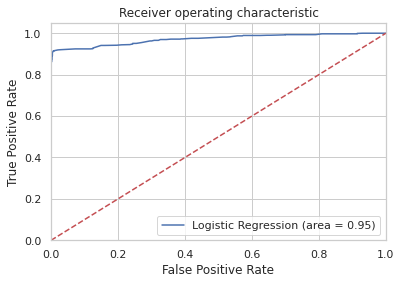

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#Random Forest

Training the Random Forest model
Now its time to train our model!

Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

Predictions and Evaluation
Let's predict off the y_test values and evaluate our model.



In [84]:
predictions2 = rfc.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.96


Model Evaluation

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1026
           1       0.99      0.92      0.96      1017

    accuracy                           0.96      2043
   macro avg       0.96      0.96      0.96      2043
weighted avg       0.96      0.96      0.96      2043



 The Confusion Matrix for the predictions.

In [87]:
print(confusion_matrix(y_test, predictions2))

[[1020    6]
 [  82  935]]


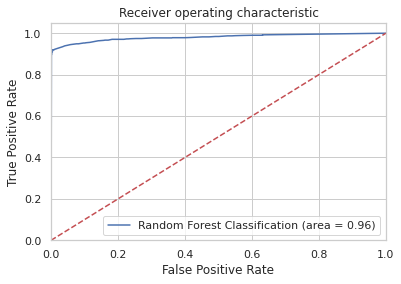

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classification (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('rfc_ROC')
plt.show()

#Decision Tree

Training a Decision Tree Model
Let's start by training a single decision tree first!

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dtree =  DecisionTreeClassifier()

In [91]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Model evaluation

In [92]:
predictions3 = dtree.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.96


In [93]:
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1026
           1       1.00      0.92      0.96      1017

    accuracy                           0.96      2043
   macro avg       0.96      0.96      0.96      2043
weighted avg       0.96      0.96      0.96      2043



The Confusion Matrix for the predictions.

In [95]:
confusion_matrix(y_test, predictions3)

array([[1022,    4],
       [  82,  935]])

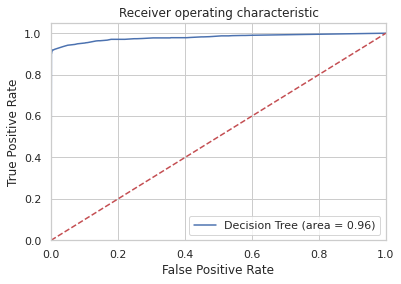

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dtree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('dtree_ROC')
plt.show()

#Conclusion




1. Female and male both have equal number of stroke cases.

2. As peopke start to age the risk of having a stroke is increasing, most of stroke cases belong to 58-80 age group that means most of patients are in their older age. 

3. Yes, age plays a role in getting stroke. Most likely older age patient are likely to get stroke.

4. Average glucose level for patients with stroke: 132.54473895582322

5. Normaly person who smoke are more likely to have a chance of stroke but in our dataset smoking doesn't have much impact on stroke.

6. Yes, work_type predict stroke. Private job patients have more number of stroke cases then self employed and govt. job

7. Both Urban and rural have equal number of stroke cases.





Comparing the Models, Random Forest Classification and Decision Tree has higher accuracy rate i.e, 96%